# Compare filing date and earnings call date

The tabular financial data comes with filing dates - do these align well with earnings call dates for the year by quarter?

## Packages and Load

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates.parquet') 
df

,ticker,fixed_quarter_date,earnings_call_date,Rating,Rating Agency Name,rating_date,CR_source,Rating Rank AAA is 10,Next Rating,Next Rating Date,...,Altman_Z,Change Direction Since Last Fixed Quarter Date,Change Since Last Fixed Quarter Date,Description,Company Name,Sector,Industry Group,Industry,Sub-Industry,Comment
0,AAPL,2014-07-01,2014-04-23,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,6.530889,None,NaN,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
1,AAPL,2014-10-01,2014-07-22,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,4.324703,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
2,AAPL,2015-01-01,2014-10-20,AA,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,...,6.153503,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
3,AAPL,2015-04-01,2015-01-27,AA,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,...,3.985264,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
4,AAPL,2015-07-01,2015-04-27,AA,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,...,6.295942,Same As Last Fixed Quarter Date,0.0,"Apple Inc. (Apple) designs, manufactures and m...",APPLE INC,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals","Manufacturers of cellular phones, personal com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,ZTS,2015-10-01,2015-08-04,BBB,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,...,3.500267,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7330,ZTS,2016-01-01,2015-11-03,BBB,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,...,3.198497,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7331,ZTS,2016-04-01,2016-02-16,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,2.782747,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."
7332,ZTS,2016-07-01,2016-05-04,BBB,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,...,3.000131,Same As Last Fixed Quarter Date,0.0,"Zoetis Inc. is focused on the discovery, devel...",ZOETIS INC,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,Pharmaceuticals,"Companies engaged in the research, development..."


## Analyze Filing Date

Note that there are technically three different filing dates from the three different tabular financial data sources. However, in `Check Filing Date Across Sources.ipynb`, I found differences occur less than 1% of the time, so this isn't worth worrying about.

In [3]:
# min and max of fillingDate and earnings_call_date
print('Minimum fillingDate:', df['fillingDate'].min())
print('Maximum fillingDate:', df['fillingDate'].max())
print('Minimum earnings_call_date:', df['earnings_call_date'].min())
print('Maximum earnings_call_date:', df['earnings_call_date'].max())

Minimum fillingDate: 2010-03-31
Maximum fillingDate: 2017-05-10
Minimum earnings_call_date: 2010-05-03
Maximum earnings_call_date: 2016-09-30


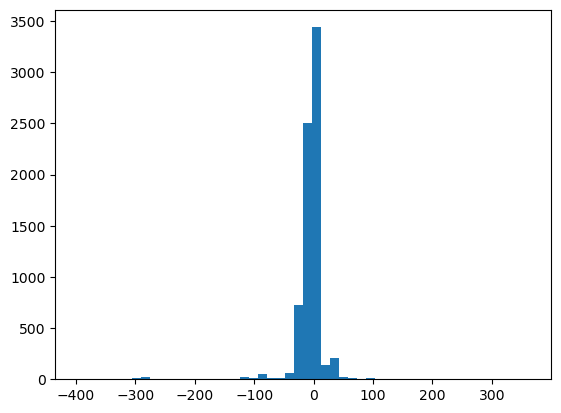

In [4]:
# Check earnings call days since fillingDate
df['call_days_since_filing'] = (pd.to_datetime(df['earnings_call_date']) - pd.to_datetime(df['fillingDate'])).dt.days

# Histogram of days since fillingDate
plt.hist(df['call_days_since_filing'], bins=50)
plt.show()

In [5]:
# Summary stats of call_days_since_filing
print(df['call_days_since_filing'].describe())

count    7334.000000
mean       -7.912463
std        34.270349
min      -397.000000
25%       -11.000000
50%        -2.000000
75%         0.000000
max       362.000000
Name: call_days_since_filing, dtype: float64


SEC guidance for reporting earnings is within 2 days

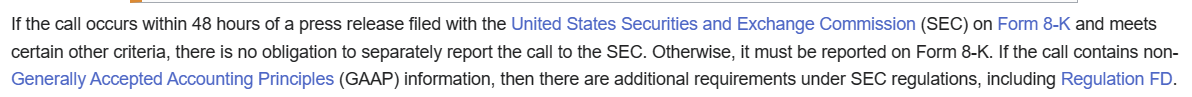

How often is this violated?

In [6]:
# Share more than 2 days away from filing
# Absolute value before and after
# Violated if greater than 2
print('Share of calls with earnings call more than 2 days away from filing:', (np.abs(df['call_days_since_filing']) > 2).mean())
print('count of calls with earnings call more than 2 days away from filing:', (np.abs(df['call_days_since_filing']) > 2).sum())

Share of calls with earnings call more than 2 days away from filing: 0.5433596945732206
count of calls with earnings call more than 2 days away from filing: 3985


More conservatively, try within 45 days

In [7]:
print('Share of calls with earnings call more than 45 days away from filing:', (np.abs(df['call_days_since_filing']) > 45).mean())
print('count of calls with earnings call more than 45 days away from filing:', (np.abs(df['call_days_since_filing']) > 45).sum())

Share of calls with earnings call more than 45 days away from filing: 0.03313335151349877
count of calls with earnings call more than 45 days away from filing: 243
